## Екзаменаційна робота
## По курсу СТМЕП
## Виконала студентка групи ЕК-61
## Комаріст Катерина
### Варіант 2
### Завдання:
- Linear regression - n factors (№2)
- Bayes (№9)

## Завдання 1. Linear regression - n factors

In [180]:
#imports
import matplotlib.pyplot as plt
import seaborn as sns

import math
import re

import pandas as pd
from pandas.tseries.offsets import DateOffset
import numpy as np

from datetime import date, timedelta
import plotly.offline as ply
import plotly.graph_objs as go
from plotly.tools import make_subplots
import plotly.express as px

ply.init_notebook_mode(connected=True)

from sklearn.impute import SimpleImputer # used for handling missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn.preprocessing import StandardScaler # used for feature scaling


import plotly.graph_objects as go
%matplotlib inline

In [181]:
startups = pd.read_csv("startups.csv",sep=';', decimal=",")

In [182]:
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [183]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [184]:
round(startups.describe())

,R&D Spend,Administration,Marketing Spend,Profit
count,50.0,50.0,50.0,50.0
mean,73722.0,121345.0,211025.0,112013.0
std,45902.0,28018.0,122290.0,40306.0
min,0.0,51283.0,0.0,14681.0
25%,39936.0,103731.0,129300.0,90139.0
50%,73051.0,122700.0,212716.0,107978.0
75%,101603.0,144842.0,299469.0,139766.0
max,165349.0,182646.0,471784.0,192262.0


In [185]:
startups.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [186]:
df = startups.copy()

Переменная State преобразовывается в две дамми-переменные New_York и California

In [187]:
for i in range(df.shape[0]):
    if df.loc[i,'State'] == 'New York':
        df.loc[i,'New_York'] =1
    elif df.loc[i,'State']=='California':
        df.loc[i,'California'] =1

df[['New_York']] = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0).fit_transform(df[['New_York']])
df[['California']] = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0).fit_transform(df[['California']])

In [188]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,New_York,California
0,165349.20,136897.80,471784.10,New York,192261.83,1.0,0.0
1,162597.70,151377.59,443898.53,California,191792.06,0.0,1.0
2,153441.51,101145.55,407934.54,Florida,191050.39,0.0,0.0
3,144372.41,118671.85,383199.62,New York,182901.99,1.0,0.0
4,142107.34,91391.77,366168.42,Florida,166187.94,0.0,0.0


In [189]:
df = df.drop('State', axis = 1)

In [190]:
px.histogram(df['R&D Spend'], height = 300, title='R&D Spend')

In [191]:
px.histogram(df['Administration'], height = 300, title='Administration')

In [192]:
px.histogram(df['Marketing Spend'], height = 300, title='Marketing Spend')

In [193]:
px.histogram(df['Profit'], height = 300, title='Profit')

Итак, данные имеют нужный тип, пропуски и выбросы отсутствуют. 

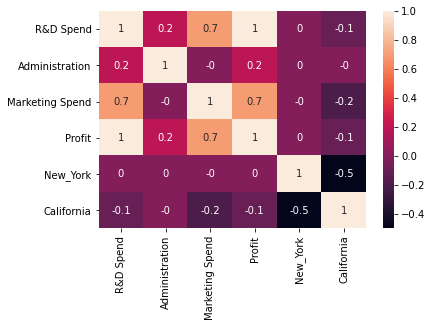

In [194]:
corrMatrix = round(df.corr(),1)
sns.heatmap(corrMatrix, annot=True)
plt.show()

Наиолее коррелирует с фактором Profit фактор R&D Spend и Marketing Spend.

In [195]:
df = df[['Profit','R&D Spend', 'Administration', 'Marketing Spend', 'New_York',
       'California']]

In [196]:
# Создаиние тестовой и обучающей выборки
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

Строится модел линейной регрессии со всеми факторами.

In [197]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
mr=LinearRegression().fit(X_train, y_train)

In [198]:
# Getting parameters
mr.coef_, mr.intercept_

(array([ 8.23509041e-01, -8.62452561e-02,  2.27006887e-02,  7.10975760e+02,
         1.61896791e+03]),
 55957.03739355301)

In [199]:
# Predicting the Test set results
y_pred=mr.predict(X_test)

In [200]:
# Coefficient of determination R^2
mr.score(X_train, y_train), mr.score(X_test, y_test)

(0.9489063612338346, 0.9442055210815734)

In [201]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, mr.predict(X_train)), mean_squared_error(y_test, y_pred)

(77181795.64313327, 98047662.34209113)

In [202]:
summary = pd.DataFrame()
model_info = {'model':'all_factors',
                         'R2_train':round(mr.score(X_train, y_train),3),
                         'R2_test':round( mr.score(X_test, y_test),3),
                         'MSE_train':round(mean_squared_error(y_train, mr.predict(X_train))),
                         'MSE_test': round(mean_squared_error(y_test, y_pred),2)}
summary = summary.append(model_info, ignore_index=True)
summary = summary[[ 'model','MSE_test', 'MSE_train', 'R2_test', 'R2_train']]
summary

,model,MSE_test,MSE_train,R2_test,R2_train
0,all_factors,98047662.34,77181796.0,0.944,0.949


Коефициенты детерминации как на тестовой, так и на обучающей выборках очень близки к 1, что свидетельствует о том, что на прим. 95% независимые факторы описывают изменения фактора Profit. Модель можно использовать для прогноза

In [203]:
# p-values
import statsmodels.api as sm
X_const=sm.add_constant(X_train)
mr1=sm.OLS(y_train, X_const).fit()
mr1.pvalues
mr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     126.3
Date:                Thu, 05 Nov 2020   Prob (F-statistic):           6.00e-21
Time:                        14:29:57   Log-Likelihood:                -419.99
No. Observations:                  40   AIC:                             852.0
Df Residuals:                      34   BIC:                             862.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.596e+04   8487.235      6.593      0.000    3.87e+04    7.32e+04
x1             0.8235      0.052     15.777      0.000       0.717       0.930
x2            -0.0862      0.063     -1.366      0.181      -0.215       0.042
x3             0.0227      0.019      1.174      0.249      -0.017       0.062
x4           710.9758   3653.258      0.195      0.847   -6713.338    8135.289
x5          1618.9679   3872.242      0.418      0.679   -6250.375    9488.311
==============================================================================
Omnibus:                       19.902   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.494
Skew:                          -1.305   Prob(JB):                     3.23e-08
Kurtosis:                       6.727   Cond. No.                     1.67e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Из всех факторов только первый (R&D Spend) оказался статистически значимым, поскольку имеет p-значение меньше 0,01. Однако если взять тольок его для построения модели, это будет простая линейная модель, а задание поставлено построить многофакторную. Построим еще одну модель с двумя факторами R&D Spend и Marketing Spend, поскольку именно они наиболее коррелируют с зависимой переменной.

In [204]:
X1 = df.iloc[:, [1,3]].values
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.2, random_state=3)

In [205]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
mr2=LinearRegression().fit(X_train1, y_train1)

In [206]:
# Getting parameters
mr2.coef_, mr2.intercept_

(array([0.79814187, 0.02901412]), 46794.24583342804)

In [207]:
# Predicting the Test set results
y_pred1=mr2.predict(X_test1)

In [208]:
# Coefficient of determination R^2
mr2.score(X_train1, y_train1), mr2.score(X_test1, y_test1)

(0.9459212470646745, 0.9612876028942208)

In [209]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train1, mr2.predict(X_train1)), mean_squared_error(y_test1, y_pred1)

(81691094.20434886, 68029312.45992586)

In [210]:
model_info = {'model':'2 factors(R&D, Marketing Spend)',
                         'R2_train':round(mr2.score(X_train1, y_train1),3),
                         'R2_test':round( mr2.score(X_test1, y_test1),3),
                         'MSE_train':round(mean_squared_error(y_train1, mr2.predict(X_train1))),
                         'MSE_test': round(mean_squared_error(y_test1, y_pred1),2)}
summary = summary.append(model_info, ignore_index=True)
summary = summary[[ 'model','MSE_test', 'MSE_train', 'R2_test', 'R2_train']]
summary

,model,MSE_test,MSE_train,R2_test,R2_train
0,all_factors,98047662.34,77181796.0,0.944,0.949
1,"2 factors(R&D, Marketing Spend)",68029312.46,81691094.0,0.961,0.946


Видим, что вторая модель имеет более высокий R2_test, чем первая и значительно меньшую MSE_test. Делаем вывод, что она более высокого качества. Ниже визуализируются результаты построенной модели (второй) и сравниваются с реальными. 

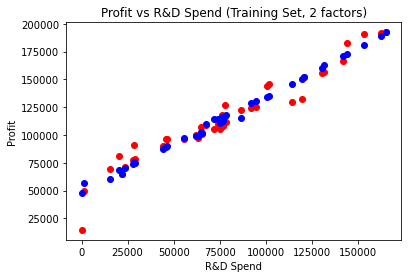

In [211]:
# Visualising the Training set results
plt.scatter(X_train1[:, 0], y_train1, color='red')
plt.plot(X_train1[:, 0], mr2.predict(X_train1), 'bo')
plt.title('Profit vs R&D Spend (Training Set, 2 factors)')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

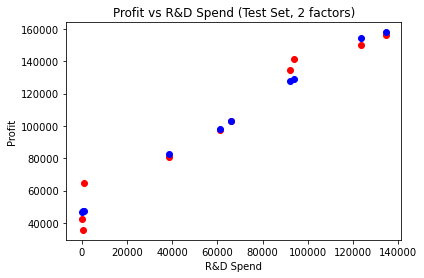

In [213]:
# Visualising the Test set results
plt.scatter(X_test1[:, 0], y_test1, color='red')
plt.plot(X_test1[:, 0], mr2.predict(X_test1), 'bo')
plt.title('Profit vs R&D Spend (Test Set, 2 factors)')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

## Задание 2. Bayes

In [235]:
ads = pd.read_csv("ads.csv",sep=';', decimal=",")

In [215]:
ads.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [217]:
ads.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [218]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


Переменная  Gender преобразовывается в булевую переменную.

In [236]:
for i in range(ads.shape[0]):
    if ads.loc[i,'Gender'] == 'Female':
        ads.loc[i,'Gender'] =1
    else:
        ads.loc[i,'Gender'] =0

In [224]:
ads.Gender.value_counts()

1    204
0    196
Name: Gender, dtype: int64

В данных нету пропусков и выбросов. В качестве классификатора выступает переменная Purchased. Переменную User ID не включаем в набор факторов, поскольку она не информативна. 

In [237]:
# Splitting the dataset into the Training set and Test set
X = ads.iloc[:, 1:4].values
y = ads.iloc[:, 4].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Шкалируем данные на основе стандартного отклонения. 

In [241]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

In [242]:
# Fitting Naive Bayes to the Training set (4 variables)
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB().fit(X_train, y_train)

In [243]:
# Predicting the Test set results
y_pred3 = nb.predict(X_test)
nb.score(X_test,y_test)

0.85

In [244]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred3)
print(cm)

[[41  7]
 [ 5 27]]


Вывод: 

Алгоритм классификации на 85% точно классифицирует объекты. Больше неправильно-классифицированых объектов попало в ложно-позитивную группу.